In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from ISLP import load_data
from ISLP.models import (ModelSpec as MS ,summarize)

from ISLP import confusion_table
from ISLP.models import contrast
from sklearn.discriminant_analysis import (LinearDiscriminantAnalysis as LDA, QuadraticDiscriminantAnalysis as QDA)
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
Smarket = load_data('Smarket')
Smarket

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,2001,0.381,-0.192,-2.624,-1.055,5.010,1.19130,0.959,Up
1,2001,0.959,0.381,-0.192,-2.624,-1.055,1.29650,1.032,Up
2,2001,1.032,0.959,0.381,-0.192,-2.624,1.41120,-0.623,Down
3,2001,-0.623,1.032,0.959,0.381,-0.192,1.27600,0.614,Up
4,2001,0.614,-0.623,1.032,0.959,0.381,1.20570,0.213,Up
...,...,...,...,...,...,...,...,...,...
1245,2005,0.422,0.252,-0.024,-0.584,-0.285,1.88850,0.043,Up
1246,2005,0.043,0.422,0.252,-0.024,-0.584,1.28581,-0.955,Down
1247,2005,-0.955,0.043,0.422,0.252,-0.024,1.54047,0.130,Up
1248,2005,0.130,-0.955,0.043,0.422,0.252,1.42236,-0.298,Down


In [3]:
Smarket.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1250 entries, 0 to 1249
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   Year       1250 non-null   int64   
 1   Lag1       1250 non-null   float64 
 2   Lag2       1250 non-null   float64 
 3   Lag3       1250 non-null   float64 
 4   Lag4       1250 non-null   float64 
 5   Lag5       1250 non-null   float64 
 6   Volume     1250 non-null   float64 
 7   Today      1250 non-null   float64 
 8   Direction  1250 non-null   category
dtypes: category(1), float64(7), int64(1)
memory usage: 79.6 KB


In [4]:
cols = Smarket.columns
cols

Index(['Year', 'Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume', 'Today',
       'Direction'],
      dtype='object')

In [5]:
# Convert Direction to dummy vars and show correlation matrix

df_dum = pd.get_dummies(Smarket, ['Direction']).corr()

df_cols = df_dum.columns

df_dum

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction_Down,Direction_Up
Year,1.000000,0.029700,0.030596,0.033195,0.035689,0.029788,0.539006,0.030095,-0.074608,0.074608
Lag1,0.029700,1.000000,-0.026294,-0.010803,-0.002986,-0.005675,0.040910,-0.026155,0.039757,-0.039757
Lag2,0.030596,-0.026294,1.000000,-0.025897,-0.010854,-0.003558,-0.043383,-0.010250,0.024081,-0.024081
Lag3,0.033195,-0.010803,-0.025897,1.000000,-0.024051,-0.018808,-0.041824,-0.002448,-0.006132,0.006132
Lag4,0.035689,-0.002986,-0.010854,-0.024051,1.000000,-0.027084,-0.048414,-0.006900,-0.004215,0.004215
Lag5,0.029788,-0.005675,-0.003558,-0.018808,-0.027084,1.000000,-0.022002,-0.034860,-0.005423,0.005423
Volume,0.539006,0.040910,-0.043383,-0.041824,-0.048414,-0.022002,1.000000,0.014592,-0.022951,0.022951
Today,0.030095,-0.026155,-0.010250,-0.002448,-0.006900,-0.034860,0.014592,1.000000,-0.730563,0.730563
Direction_Down,-0.074608,0.039757,0.024081,-0.006132,-0.004215,-0.005423,-0.022951,-0.730563,1.000000,-1.000000
Direction_Up,0.074608,-0.039757,-0.024081,0.006132,0.004215,0.005423,0.022951,0.730563,-1.000000,1.000000


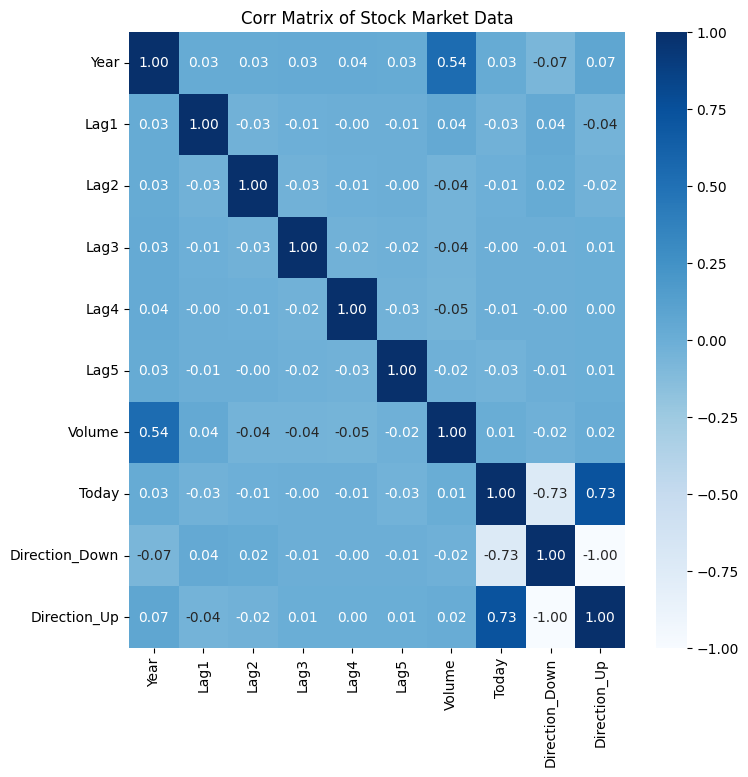

In [6]:
plt.figure(figsize=(8,8))
sns.heatmap(df_dum, annot=True, fmt='.2F', cmap='Blues',
            xticklabels=df_cols,
            yticklabels=df_cols)
plt.title('Corr Matrix of Stock Market Data')
plt.show()

Only a meaningful correlation betwe vol and year.

<Axes: >

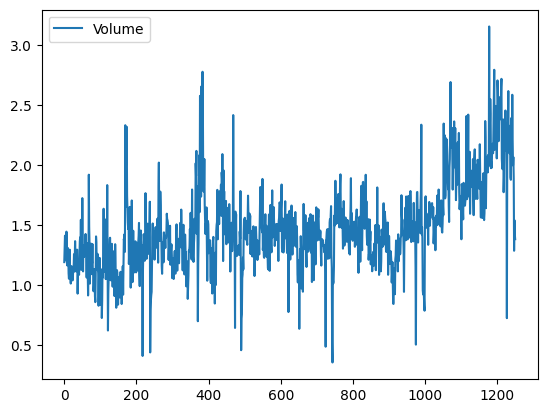

In [7]:
Smarket.plot(y='Volume')

In [8]:
Smarket.columns

Index(['Year', 'Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume', 'Today',
       'Direction'],
      dtype='object')

In [ ]:
allvars = Smarket.columns.drop(['Today', 'Direction', 'Year'])
design = MS(allvars)
X = design.fit_transform(Smarket)
y = Smarket['Direction'] == 'Up'
glm = sm.GLM(y, X, family=sm.families.Binomial())
results = glm.fit()
summarize(results)

,coef,std err,z,P>|z|
intercept,-0.1260,0.241,-0.523,0.601
Lag1,-0.0731,0.050,-1.457,0.145
Lag2,-0.0423,0.050,-0.845,0.398
Lag3,0.0111,0.050,0.222,0.824
Lag4,0.0094,0.050,0.187,0.851
Lag5,0.0103,0.050,0.208,0.835
Volume,0.1354,0.158,0.855,0.392


In [10]:
results.params

intercept   -0.126000
Lag1        -0.073074
Lag2        -0.042301
Lag3         0.011085
Lag4         0.009359
Lag5         0.010313
Volume       0.135441
dtype: float64

In [11]:
results.pvalues

intercept    0.600700
Lag1         0.145232
Lag2         0.398352
Lag3         0.824334
Lag4         0.851445
Lag5         0.834998
Volume       0.392404
dtype: float64

In [12]:
probs = results.predict() # given no arg, just predicts probabilities for the training data.
probs[:10]

array([0.50708413, 0.48146788, 0.48113883, 0.51522236, 0.51078116,
       0.50695646, 0.49265087, 0.50922916, 0.51761353, 0.48883778])

In [15]:
probs.shape

(1250,)

In [17]:
probs > 0.5

array([ True, False, False, ...,  True,  True,  True])

In [20]:
labels = np.array(['Down'] * probs.shape[0])
labels[probs > 0.5] = 'Up'

In [19]:
labels[labels == 'Up']

array(['Up', 'Up', 'Up', 'Up', 'Up', 'Up', 'Up', 'Up', 'Up', 'Up', 'Up',
       'Up', 'Up', 'Up', 'Up', 'Up', 'Up', 'Up', 'Up', 'Up', 'Up', 'Up',
       'Up', 'Up', 'Up', 'Up', 'Up', 'Up', 'Up', 'Up', 'Up', 'Up', 'Up',
       'Up', 'Up', 'Up', 'Up', 'Up', 'Up', 'Up', 'Up', 'Up', 'Up', 'Up',
       'Up', 'Up', 'Up', 'Up', 'Up', 'Up', 'Up', 'Up', 'Up', 'Up', 'Up',
       'Up', 'Up', 'Up', 'Up', 'Up', 'Up', 'Up', 'Up', 'Up', 'Up', 'Up',
       'Up', 'Up', 'Up', 'Up', 'Up', 'Up', 'Up', 'Up', 'Up', 'Up', 'Up',
       'Up', 'Up', 'Up', 'Up', 'Up', 'Up', 'Up', 'Up', 'Up', 'Up', 'Up',
       'Up', 'Up', 'Up', 'Up', 'Up', 'Up', 'Up', 'Up', 'Up', 'Up', 'Up',
       'Up', 'Up', 'Up', 'Up', 'Up', 'Up', 'Up', 'Up', 'Up', 'Up', 'Up',
       'Up', 'Up', 'Up', 'Up', 'Up', 'Up', 'Up', 'Up', 'Up', 'Up', 'Up',
       'Up', 'Up', 'Up', 'Up', 'Up', 'Up', 'Up', 'Up', 'Up', 'Up', 'Up',
       'Up', 'Up', 'Up', 'Up', 'Up', 'Up', 'Up', 'Up', 'Up', 'Up', 'Up',
       'Up', 'Up', 'Up', 'Up', 'Up', 'Up', 'Up', 'U

In [22]:
confusion_table(labels, Smarket['Direction'])

Truth,Down,Up
Predicted,,
Down,145,141
Up,457,507


In [24]:
#Error rate:
(457+141)/labels.shape[0]

0.4784

Even this terrible error rate (barely better than random guessing) is optimistic since we predicted on the training data.

Apply a test/train split below:

In [27]:
train = (Smarket.Year < 2005)
Smarket_train = Smarket.loc[train]
Smarket_test = Smarket.loc[~train]
print(Smarket_train.shape)
print(Smarket_test.shape)

(998, 9)
(252, 9)


In [29]:
Smarket.columns

Index(['Year', 'Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume', 'Today',
       'Direction'],
      dtype='object')

In [32]:
# loc indexer basically the same as in pandas:

Smarket.loc[0:5, ['Lag1','Lag3', 'Lag5']]

,Lag1,Lag3,Lag5
0,0.381,-2.624,5.010
1,0.959,-0.192,-1.055
2,1.032,0.381,-2.624
3,-0.623,0.959,-0.192
4,0.614,1.032,0.381
5,0.213,-0.623,0.959


In [37]:
X_train, X_test = X.loc[train], X.loc[~train]
y_train, y_test = y.loc[train], y.loc[~train]
glm_train = sm.GLM(y_train, X_train, family=sm.families.Binomial())
results = glm_train .fit ()
probs = results.predict(exog=X_test)

In [39]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Direction   No. Observations:                  998
Model:                            GLM   Df Residuals:                      991
Model Family:                Binomial   Df Model:                            6
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -690.55
Date:                Sat, 11 Jan 2025   Deviance:                       1381.1
Time:                        20:09:08   Pearson chi2:                     998.
No. Iterations:                     4   Pseudo R-squ. (CS):           0.002162
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1912      0.334      0.573      0.567      -0.463       0.845
Lag1          -0.0542      0.052     -1.046      0.295      -0.156       0.047
Lag2          -0.0458      0.052     -0.884      0.377      -0.147       0.056
Lag3           0.0072      0.052      0.139      0.889      -0.094       0.108
Lag4           0.0064      0.052      0.125      0.901      -0.095       0.108
Lag5          -0.0042      0.051     -0.083      0.934      -0.104       0.096
Volume        -0.1163      0.240     -0.485      0.628      -0.586       0.353
==============================================================================
"""

In [42]:
D = Smarket['Direction']
L_train, L_test = D.loc[train], D.loc[~train]

In [43]:
labels = np.array (['Down']*252)
labels[probs > 0.5] = 'Up'
confusion_table(labels, L_test)

Truth,Down,Up
Predicted,,
Down,77,97
Up,34,44


In [44]:
# Note: taking the mean of a boolean array for (in)correct answer gives the avg % (in)correct

np.mean(labels == L_test), np.mean(labels != L_test)

(np.float64(0.4801587301587302), np.float64(0.5198412698412699))

In [47]:
# Just use params with lowest p-value to see if we get better fit for logistic regression:

model = MS(['Lag1', 'Lag2']).fit(Smarket)
X = model.transform(Smarket)
X_train, X_test = X.loc[train], X.loc[~train]
glm_train = sm.GLM(y_train, X_train, family=sm.families.Binomial())
results = glm_train.fit()
probs = results.predict(exog=X_test)
labels = np.array (['Down']*252)
labels[probs > 0.5] = 'Up'
confusion_table(labels, L_test)

Truth,Down,Up
Predicted,,
Down,35,35
Up,76,106


In [48]:
#Overall accuracy and accuracy when regression predicts increase:
(35+106)/252, 106/(106+76)

(0.5595238095238095, 0.5824175824175825)

In [53]:
# Test predictions for specific values of Lag1 and Lag2:

newdata = pd.DataFrame({'Lag1': [1.2, 1.5], 'Lag2': [1.1, -0.8]})
newX = model.transform(newdata) # simple adds intercept column in this case
results.predict(newX)

0    0.479146
1    0.496094
dtype: float64

### Linear Discriminant Analysis

In [60]:
# LDA estimator automatically adds intgercept, so remove from X matrices
# Can directly use labels rather than boolean vector Y_train

lda = LDA(store_covariance=True)

dropcol = 'intercept'

try:
    X_train, X_test = [M.drop(columns=[dropcol]) for M in [X_train, X_test]]
except KeyError:
    print(f'"{dropcol}" not found in dataframe.')

lda.fit(X_train, L_train)

"intercept" not found in dataframe.


LinearDiscriminantAnalysis(store_covariance=True)

In [61]:
# mean values of features (predictors, k) within each class:

lda.means_

array([[ 0.04279022,  0.03389409],
       [-0.03954635, -0.03132544]])

In [62]:
# Note: sklearn typically uses trailing _ to denote a quantity estimated when using the fit() method.

lda.classes_

array(['Down', 'Up'], dtype='<U4')

In [63]:
lda.priors_

array([0.49198397, 0.50801603])

In [64]:
lda.scalings_

array([[-0.64201904],
       [-0.51352928]])

In [65]:
lda_pred = lda.predict(X_test)

In [71]:
confusion_table(lda_pred, L_test)

Truth,Down,Up
Predicted,,
Down,35,35
Up,76,106


In [72]:
L_test.shape

(252,)

In [74]:
# Error rate:

(76+35)/L_test.shape[0]

0.44047619047619047

In [77]:
lda_prob = lda.predict_proba(X_test)

np.all(np.where(lda_prob[:,1] >= 0.5, 'Up', 'Down'))

np.True_

In [80]:
np.all(np.where(lda_prob[:,1] >= 0.5, 'Up', 'Down') == lda_pred)

np.True_

In [85]:
lda_prob.shape

(252, 2)

In [96]:
# Can easily use different prob threshold than 50%, eg 90% (but no preductions this high):

np.sum(lda_prob[:,1] >= 0.9)

np.int64(0)

In [95]:
# Get max value of each col:

[round(np.max(lda_prob[:, col]), 3) for col in range(lda_prob.shape[1])]

# Note: np.argmax returns the indices of the maximum values along an axis.


[np.float64(0.52), np.float64(0.542)]

In [91]:
# Easier:

np.max(lda_prob, axis=0)

array([0.52023495, 0.54221326])

### Quadratic Discriminant Analysis

In [99]:
qda = QDA(store_covariance=True)
qda.fit(X_train, L_train)

QuadraticDiscriminantAnalysis(store_covariance=True)

In [106]:
qda.means_, qda.priors_

(array([[ 0.04279022,  0.03389409],
        [-0.03954635, -0.03132544]]),
 array([0.49198397, 0.50801603]))

In [108]:
# The QDA() classifier will estimate one covariance matrix per class.

qda.covariance_[0]

array([[ 1.50662277, -0.03924806],
       [-0.03924806,  1.53559498]])

In [109]:
qda_pred = qda.predict(X_test)
confusion_table(qda_pred, L_test)


Truth,Down,Up
Predicted,,
Down,30,20
Up,81,121


In [111]:
round(np.mean(qda_pred == L_test), 3)

np.float64(0.599)

### Naive Bayes

In [112]:
NB = GaussianNB()
NB.fit(X_train, L_train)

GaussianNB()

In [113]:
NB.classes_

array(['Down', 'Up'], dtype='<U4')

In [114]:
NB.class_prior_

array([0.49198397, 0.50801603])

In [115]:
NB.theta_

array([[ 0.04279022,  0.03389409],
       [-0.03954635, -0.03132544]])

In [116]:
NB.var_

array([[1.50355429, 1.53246749],
       [1.51401364, 1.48732877]])

In [123]:
NB?

Type:        GaussianNB
String form: GaussianNB()
File:        ~/Dropbox/ ES_Docs/Python_Projects/myenv/lib/python3.12/site-packages/sklearn/naive_bayes.py
Docstring:  
Gaussian Naive Bayes (GaussianNB).

Can perform online updates to model parameters via :meth:`partial_fit`.
For details on algorithm used to update feature means and variance online,
see Stanford CS tech report STAN-CS-79-773 by Chan, Golub, and LeVeque:

    http://i.stanford.edu/pub/cstr/reports/cs/tr/79/773/CS-TR-79-773.pdf

Read more in the :ref:`User Guide <gaussian_naive_bayes>`.

Parameters
----------
priors : array-like of shape (n_classes,), default=None
    Prior probabilities of the classes. If specified, the priors are not
    adjusted according to the data.

var_smoothing : float, default=1e-9
    Portion of the largest variance of all features that is added to
    variances for calculation stability.

    .. versionadded:: 0.20

Attributes
----------
class_count_ : ndarray of shape (n_classes,)
    number 

In [121]:
# Verify the mean computation:

X_train[L_train == 'Down'].mean()

Lag1    0.042790
Lag2    0.033894
dtype: float64

In [122]:
X_train[L_train == 'Down'].var(ddof=0)

Lag1    1.503554
Lag2    1.532467
dtype: float64

In [124]:
nb_labels = NB.predict(X_test)
confusion_table(nb_labels, L_test)

Truth,Down,Up
Predicted,,
Down,29,20
Up,82,121


In [128]:
# Accuracy:

round((29+121)/len(labels),3)

0.595

In [131]:
NB.predict_proba(X_test)[:5]

array([[0.4873288 , 0.5126712 ],
       [0.47623584, 0.52376416],
       [0.46529531, 0.53470469],
       [0.47484469, 0.52515531],
       [0.49020587, 0.50979413]])

### K-Nearest Neighbors

In [192]:
knn1 = KNeighborsClassifier(n_neighbors=1)
knn1.fit(X_train, L_train)
knn1_pred = knn1.predict(X_test)
confusion_table(knn1_pred, L_test)


Truth,Down,Up
Predicted,,
Down,43,58
Up,68,83


In [193]:
# Accuracy:

(43+83)/len(L_test)

0.5

Accuracy for K=1 is no better than random guessing. Try K=3:

In [194]:
knn1 = KNeighborsClassifier(n_neighbors=3)
knn1.fit(X_train, L_train)
knn1_pred = knn1.predict(X_test)
ct = confusion_table(knn1_pred, L_test)
ct

Truth,Down,Up
Predicted,,
Down,48,55
Up,63,86


In [195]:
# Accuracy:

round((np.diagonal(ct.values).sum())/len(L_test),3)

np.float64(0.532)

Only a slight improvement. Further increasing K doesn't improve accuracy.

Apply KNN to Caravan data:

In [196]:
Caravan = load_data('Caravan')
Purchase = Caravan['Purchase']
Purchase.value_counts()

Purchase
No     5474
Yes     348
Name: count, dtype: int64

In [197]:
Caravan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5822 entries, 0 to 5821
Data columns (total 86 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   MOSTYPE   5822 non-null   int64   
 1   MAANTHUI  5822 non-null   int64   
 2   MGEMOMV   5822 non-null   int64   
 3   MGEMLEEF  5822 non-null   int64   
 4   MOSHOOFD  5822 non-null   int64   
 5   MGODRK    5822 non-null   int64   
 6   MGODPR    5822 non-null   int64   
 7   MGODOV    5822 non-null   int64   
 8   MGODGE    5822 non-null   int64   
 9   MRELGE    5822 non-null   int64   
 10  MRELSA    5822 non-null   int64   
 11  MRELOV    5822 non-null   int64   
 12  MFALLEEN  5822 non-null   int64   
 13  MFGEKIND  5822 non-null   int64   
 14  MFWEKIND  5822 non-null   int64   
 15  MOPLHOOG  5822 non-null   int64   
 16  MOPLMIDD  5822 non-null   int64   
 17  MOPLLAAG  5822 non-null   int64   
 18  MBERHOOG  5822 non-null   int64   
 19  MBERZELF  5822 non-null   int64   
 20  MBERBOER

In [198]:
Caravan['Purchase'].value_counts()['Yes']/Caravan.shape[0]

np.float64(0.05977327378907592)

Only 6% of people purchase insurance.

In [199]:
feature_df = Caravan.drop(columns=['Purchase'])

Because the KNN classifier predicts the class of a given test observa-
tion by identifying the observations that are nearest to it, the scale of
the variables matters. Any variables that are on a large scale will have a
much larger effect on the distance between the observations, and hence on
the KNN classifier, than variables that are on a small scale.

Standardize data so all variables (features/predictors) have a mean of 0 and a std of 1.0

In [200]:
scaler = StandardScaler(with_mean=True, with_std=True, copy=True)

In [202]:
scaler.fit(feature_df) # calculate params and store in scaler
X_std = scaler.transform(feature_df) # apply params to df, retursn a
type(X_std)

numpy.ndarray

In [203]:
# scaler.transform() returns and ndarray, so convert to df:

feature_std = pd.DataFrame(X_std, columns=feature_df.columns)
feature_std.std()

MOSTYPE     1.000086
MAANTHUI    1.000086
MGEMOMV     1.000086
MGEMLEEF    1.000086
MOSHOOFD    1.000086
              ...   
AZEILPL     1.000086
APLEZIER    1.000086
AFIETS      1.000086
AINBOED     1.000086
ABYSTAND    1.000086
Length: 85, dtype: float64

In [209]:
X_train, X_test, y_train, y_test = train_test_split(feature_std, Purchase, test_size=1000, random_state=0)

In [210]:
knn1 = KNeighborsClassifier(n_neighbors=1)
knn1_pred = knn1.fit(X_train, y_train).predict(X_test)
np.mean(y_test != knn1_pred ), np.mean(y_test != "No")

(np.float64(0.113), np.float64(0.067))

In [211]:
confusion_table(knn1_pred, y_test)

Truth,No,Yes
Predicted,,
No,878,58
Yes,55,9


In [208]:
# Error rate among actual purchases (% of purchases who are correctly predicted to do so):

1 - 9/(58+9)

0.8656716417910448

Overall error rate is 11% but purchase rate is just 6.7%! So by just predicting NO for all test cases, our error rate would be just 6.7%

Error rate for actual purchases is 87%!!

Try turning K:

In [214]:
for K in range (1 ,6):
    knn = KNeighborsClassifier(n_neighbors=K)
    knn_pred = knn.fit(X_train, y_train).predict(X_test)
    C = confusion_table(knn_pred, y_test)
    templ = ('K={0:d}: # predicted to rent: {1: >2} ,' + ' # who did rent {2:d}, accuracy {3:.1%}')
    pred = C.loc['Yes'].sum()
    did_rent = C.loc['Yes','Yes']
    print(templ.format(K, pred, did_rent, did_rent / pred))

K=1: # predicted to rent: 64 , # who did rent 9, accuracy 14.1%
K=2: # predicted to rent:  6 , # who did rent 1, accuracy 16.7%
K=3: # predicted to rent: 20 , # who did rent 3, accuracy 15.0%
K=4: # predicted to rent:  4 , # who did rent 0, accuracy 0.0%
K=5: # predicted to rent:  7 , # who did rent 1, accuracy 14.3%


#### Compare to logistic regression using sklearn:

In [ ]:
# sklearn more focussed on classification than inference

In [ ]:
# 50% prob cutoff:

# Note: book has an error and uses 5 instead of 0.5 in code and reports zero predicted Yes.

logit = LogisticRegression(C=1e10, solver='liblinear')
logit.fit(X_train, y_train)
logit_pred = logit.predict_proba(X_test)
logit_labels = np.where(logit_pred[:,1] > 0.5, 'Yes', 'No')
confusion_table(logit_labels, y_test)

Truth,No,Yes
Predicted,,
No,931,67
Yes,2,0


In [218]:
# 25% prob cutoff:

logit_labels = np.where(logit_pred[:,1] > 0.25, 'Yes', 'No')
confusion_table(logit_labels, y_test)

Truth,No,Yes
Predicted,,
No,913,58
Yes,20,9


In [219]:
# Accuracy of Yes predictions

9/(20+9)

0.3103448275862069

### Linear and Poisson Regression on the Bikeshare Data

In [221]:
Bike = load_data('Bikeshare')
Bike

,season,mnth,day,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,bikers
0,1,Jan,1,0,0,6,0,clear,0.24,0.2879,0.81,0.0000,3,13,16
1,1,Jan,1,1,0,6,0,clear,0.22,0.2727,0.80,0.0000,8,32,40
2,1,Jan,1,2,0,6,0,clear,0.22,0.2727,0.80,0.0000,5,27,32
3,1,Jan,1,3,0,6,0,clear,0.24,0.2879,0.75,0.0000,3,10,13
4,1,Jan,1,4,0,6,0,clear,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8640,1,Dec,365,19,0,6,0,clear,0.42,0.4242,0.54,0.2239,19,73,92
8641,1,Dec,365,20,0,6,0,clear,0.42,0.4242,0.54,0.2239,8,63,71
8642,1,Dec,365,21,0,6,0,clear,0.40,0.4091,0.58,0.1940,2,50,52
8643,1,Dec,365,22,0,6,0,clear,0.38,0.3939,0.62,0.1343,2,36,38


In [222]:
Bike.shape, Bike.columns

((8645, 15),
 Index(['season', 'mnth', 'day', 'hr', 'holiday', 'weekday', 'workingday',
        'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
        'registered', 'bikers'],
       dtype='object'))

In [ ]:
# Linear regression:

X = MS(['mnth',
        'hr',
        'workingday',
        'temp',
        'weathersit']).fit_transform(Bike)
Y = Bike['bikers']
M_lm = sm.OLS(Y, X).fit()
M_lm.summary()

# Notice how the encoding works: columns for each unique hour, month, and weathersit


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 bikers   R-squared:                       0.675
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     457.3
Date:                Tue, 14 Jan 2025   Prob (F-statistic):               0.00
Time:                        13:41:45   Log-Likelihood:                -49743.
No. Observations:                8645   AIC:                         9.957e+04
Df Residuals:                    8605   BIC:                         9.985e+04
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
intercept                     -68.6317      5.307    -12.932      0.000     -79.035     -58.229
mnth[Feb]                       6.8452      4.287      1.597      0.110      -1.559      15.250
mnth[March]                    16.5514      4.301      3.848      0.000       8.120      24.983
mnth[April]                    41.4249      4.972      8.331      0.000      31.678      51.172
mnth[May]                      72.5571      5.641     12.862      0.000      61.499      83.615
mnth[June]                     67.8187      6.544     10.364      0.000      54.992      80.646
mnth[July]                     45.3245      7.081      6.401      0.000      31.444      59.205
mnth[Aug]                      53.2430      6.640      8.019      0.000      40.227      66.259
mnth[Sept]                     66.6783      5.925     11.254      0.000      55.064      78.293
mnth[Oct]                      75.8343      4.950     15.319      0.000      66.130      85.538
mnth[Nov]                      60.3100      4.610     13.083      0.000      51.273      69.347
mnth[Dec]                      46.4577      4.271     10.878      0.000      38.086      54.829
hr[1]                         -14.5793      5.699     -2.558      0.011     -25.750      -3.408
hr[2]                         -21.5791      5.733     -3.764      0.000     -32.817     -10.341
hr[3]                         -31.1408      5.778     -5.389      0.000     -42.468     -19.814
hr[4]                         -36.9075      5.802     -6.361      0.000     -48.281     -25.534
hr[5]                         -24.1355      5.737     -4.207      0.000     -35.381     -12.890
hr[6]                          20.5997      5.704      3.612      0.000       9.419      31.781
hr[7]                         120.0931      5.693     21.095      0.000     108.934     131.253
hr[8]                         223.6619      5.690     39.310      0.000     212.509     234.815
hr[9]                         120.5819      5.693     21.182      0.000     109.423     131.741
hr[10]                         83.8013      5.705     14.689      0.000      72.618      94.985
hr[11]                        105.4234      5.722     18.424      0.000      94.207     116.640
hr[12]                        137.2837      5.740     23.916      0.000     126.032     148.536
hr[13]                        136.0359      5.760     23.617      0.000     124.745     147.327
hr[14]                        126.6361      5.776     21.923      0.000     115.313     137.959
hr[15]                        132.0865      5.780     22.852      0.000     120.756     143.417
hr[16]                        178.5206      5.772     30.927      0.000     167.206     189.836
hr[17]                        296.2670      5.749     51.537      0.000     284.998     307.536
hr[18]     

In [232]:
# Different encoding: mnth=Dec and hr=24 are treated as baseline and no coeff is reported.
# Unreported coeffs equal to negative sum of all other coeffs. So, all coeffs sum to zero.

hr_encode = contrast ('hr', 'sum')
mnth_encode = contrast ('mnth', 'sum')

X2 = MS([mnth_encode, hr_encode, 'workingday', 'temp', 'weathersit']).fit_transform (Bike)
M2_lm = sm.OLS(Y, X2).fit()
S2 = summarize(M2_lm)
S2


,coef,std err,t,P>|t|
intercept,73.5974,5.132,14.340,0.000
mnth[Jan],-46.0871,4.085,-11.281,0.000
mnth[Feb],-39.2419,3.539,-11.088,0.000
mnth[March],-29.5357,3.155,-9.361,0.000
mnth[April],-4.6622,2.741,-1.701,0.089
mnth[May],26.4700,2.851,9.285,0.000
mnth[June],21.7317,3.465,6.272,0.000
mnth[July],-0.7626,3.908,-0.195,0.845
mnth[Aug],7.1560,3.535,2.024,0.043
mnth[Sept],20.5912,3.046,6.761,0.000


In [242]:
coef_month = S2[S2.index.str.contains('mnth')]['coef']
months = Bike['mnth'].dtype.categories
coef_month = pd.concat([coef_month, pd.Series([-coef_month.sum()], index=['mnth[Dec]'])])
coef_month


mnth[Jan]     -46.0871
mnth[Feb]     -39.2419
mnth[March]   -29.5357
mnth[April]    -4.6622
mnth[May]      26.4700
mnth[June]     21.7317
mnth[July]     -0.7626
mnth[Aug]       7.1560
mnth[Sept]     20.5912
mnth[Oct]      29.7472
mnth[Nov]      14.2229
mnth[Dec]       0.3705
dtype: float64

Text(0, 0.5, 'Coefficient')

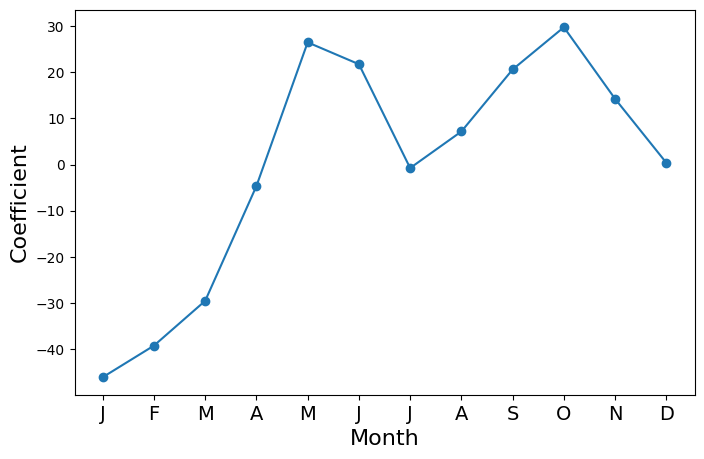

In [247]:
fig_month, ax_month = plt.subplots(figsize=(8,5))
x_month = np.arange( coef_month.shape [0])
ax_month.plot(x_month, coef_month, marker='o', ms=6)
ax_month.set_xticks(x_month)
ax_month.set_xticklabels([l[5] for l in coef_month.index], fontsize=14)
ax_month.set_xlabel('Month', fontsize=16)
ax_month.set_ylabel('Coefficient', fontsize =16)


In [248]:
coef_hr = S2[S2.index.str.contains('hr')]['coef']
coef_hr = coef_hr.reindex (['hr[{0}]'.format(h) for h in range(23)])
coef_hr = pd.concat([coef_hr, pd.Series([- coef_hr.sum()], index =['hr[23]'])
])

Text(0, 0.5, 'Coefficient')

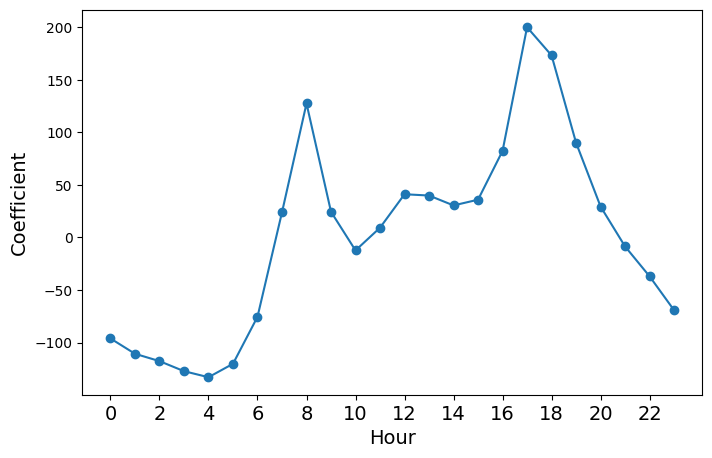

In [249]:
fig_hr, ax_hr = plt.subplots(figsize =(8,5))
x_hr = np.arange(coef_hr.shape[0])
ax_hr.plot(x_hr, coef_hr, marker='o', ms=6)
ax_hr.set_xticks(x_hr[::2])
ax_hr.set_xticklabels(range(24)[::2], fontsize=14)
ax_hr.set_xlabel('Hour', fontsize=14)
ax_hr.set_ylabel('Coefficient', fontsize=14)

Poisson Regresion:

In [252]:
M_pois = sm.GLM(Y, X2, family=sm.families.Poisson()).fit()
M_pois.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 bikers   No. Observations:                 8645
Model:                            GLM   Df Residuals:                     8605
Model Family:                 Poisson   Df Model:                           39
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.4054e+05
Date:                Tue, 14 Jan 2025   Deviance:                   2.2804e+05
Time:                        14:36:48   Pearson chi2:                 2.20e+05
No. Iterations:                     7   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
intercept                       4.1182      0.006    683.963      0.000       4.106       4.130
mnth[Jan]                      -0.6702      0.006   -113.445      0.000      -0.682      -0.659
mnth[Feb]                      -0.4441      0.005    -91.379      0.000      -0.454      -0.435
mnth[March]                    -0.2937      0.004    -70.886      0.000      -0.302      -0.286
mnth[April]                     0.0215      0.003      6.888      0.000       0.015       0.028
mnth[May]                       0.2405      0.003     82.462      0.000       0.235       0.246
mnth[June]                      0.2232      0.004     62.818      0.000       0.216       0.230
mnth[July]                      0.1036      0.004     25.121      0.000       0.096       0.112
mnth[Aug]                       0.1512      0.004     41.281      0.000       0.144       0.158
mnth[Sept]                      0.2335      0.003     75.281      0.000       0.227       0.240
mnth[Oct]                       0.2676      0.003     96.091      0.000       0.262       0.273
mnth[Nov]                       0.1503      0.003     47.248      0.000       0.144       0.156
hr[0]                          -0.7544      0.008    -95.744      0.000      -0.770      -0.739
hr[1]                          -1.2260      0.010   -123.173      0.000      -1.245      -1.206
hr[2]                          -1.5631      0.012   -131.702      0.000      -1.586      -1.540
hr[3]                          -2.1983      0.016   -133.846      0.000      -2.230      -2.166
hr[4]                          -2.8305      0.023   -125.586      0.000      -2.875      -2.786
hr[5]                          -1.8147      0.013   -134.775      0.000      -1.841      -1.788
hr[6]                          -0.4299      0.007    -62.341      0.000      -0.443      -0.416
hr[7]                           0.5752      0.004    130.544      0.000       0.567       0.584
hr[8]                           1.0769      0.004    302.220      0.000       1.070       1.084
hr[9]                           0.5818      0.004    135.727      0.000       0.573       0.590
hr[10]                          0.3369      0.005     71.372      0.000       0.328       0.346
hr[11]                          0.4941      0.004    112.494      0.000       0.486       0.503
hr[12]                          0.6796      0.004    167.040      0.000       0.672       0.688
hr[13]                          0.6736      0.004    164.722      0.000       0.666       0.682
hr[14]                          0.6249      0.004    149.570      0.000       0.617       0.633
hr[15]                          0.6538      0.004    158.205      0.000       0.646       0.662
hr[16]                          0.8743      0.004    231.040      0.000       0.867       0.882
hr[17]     

In [253]:
S_pois = summarize(M_pois)
coef_month = S_pois[S_pois.index.str.contains('mnth')]['coef']
coef_month = pd.concat([coef_month, pd.Series([- coef_month.sum()], index =['mnth[Dec]'])])
coef_hr = S_pois[S_pois.index.str.contains('hr')]['coef']
coef_hr = pd.concat([coef_hr, pd.Series([- coef_hr.sum()], index =['hr[23]'])])

/var/folders/wy/452qyqms72q8rmj4993hybjw0000gn/T/ipykernel_71027/2882997862.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax_hr.set_xticklabels(range(24)[::2], fontsize=14)


Text(0, 0.5, 'Coefficient')

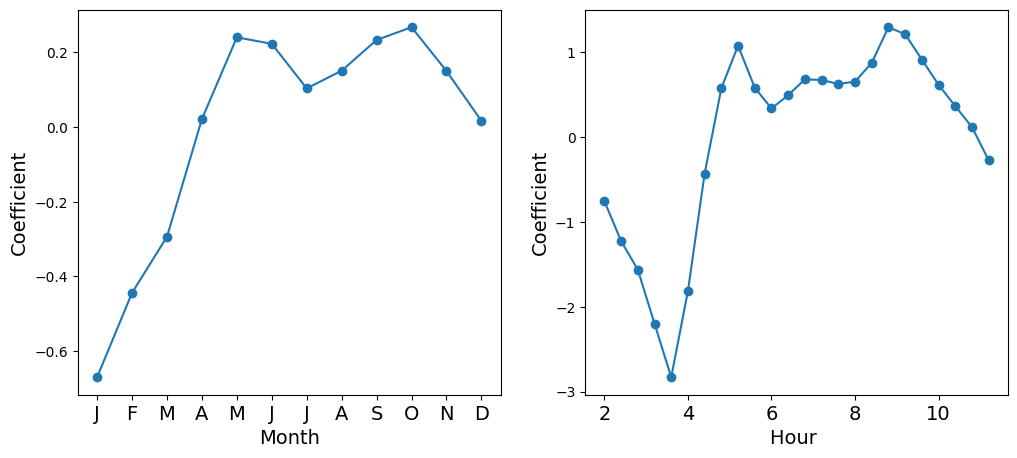

In [258]:
fig_pois, (ax_month, ax_hr) = plt.subplots(1, 2, figsize =(12,5))
ax_month.plot(x_month, coef_month, marker='o', ms=6)
ax_month.set_xticks (x_month)
ax_month.set_xticklabels ([l[5] for l in coef_month.index], fontsize=14)
ax_month.set_xlabel('Month', fontsize=14)
ax_month.set_ylabel('Coefficient', fontsize=14)
ax_hr.plot(x_hr, coef_hr, marker='o', ms=6)
ax_hr.set_xticklabels(range(24)[::2], fontsize=14)
ax_hr.set_xlabel('Hour ', fontsize=14)
ax_hr.set_ylabel('Coefficient', fontsize=14)

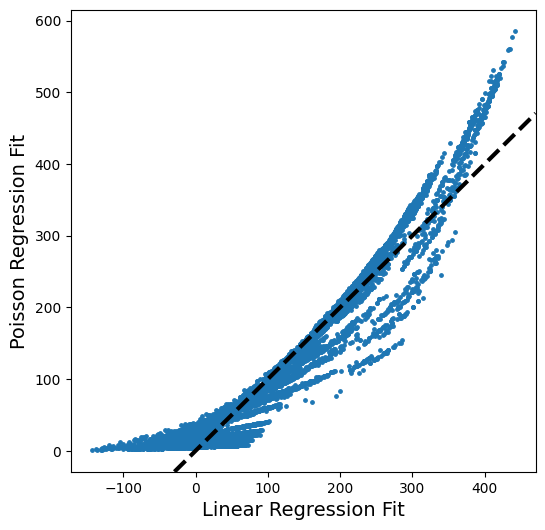

In [268]:
fig, ax = plt.subplots(figsize =(6, 6))
ax.scatter(M2_lm.fittedvalues,
           M_pois.fittedvalues,
           s=6)
ax.set_xlabel('Linear Regression Fit', fontsize=14)
ax.set_ylabel('Poisson Regression Fit', fontsize=14)
ax.axline ([0,0], color='k', linewidth=3, linestyle ='--', slope =1)